In [79]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import itertools
from imblearn.over_sampling import SMOTE

In [54]:
df_measure = pd.read_csv('measurements.csv', parse_dates=['measurement_time'])
df_measure = df_measure.sort_values(by=['measurement_time'], ascending=[True])

df_failure = pd.read_csv('failures.csv', parse_dates=['failure_time'])
df_failure = df_failure.sort_values(by=['failure_time'], ascending=[True])

In [55]:
df_measure

,measurement_time,gadget_id,vibration_x,vibration_y,pressure,temperature,Unnamed: 10,Unnamed: 11
0,2020-07-15 00:00:00.000,1,3,7,16.0,44.114437,NaN,NaN
336,2020-07-15 00:00:00.000,3,3,8,11.0,40.427740,NaN,NaN
168,2020-07-15 00:00:00.000,2,3,10,16.0,22.300000,NaN,NaN
840,2020-07-15 00:00:00.000,6,7,6,12.0,75.874521,NaN,NaN
672,2020-07-15 00:00:00.000,5,4,7,12.0,81.125342,NaN,NaN
...,...,...,...,...,...,...,...,...
671,2020-07-21 22:59:59.505,4,6,6,19.0,85.023812,NaN,NaN
335,2020-07-21 22:59:59.505,2,2,4,15.0,42.221386,NaN,NaN
167,2020-07-21 22:59:59.505,1,6,5,12.0,11.773688,NaN,NaN
839,2020-07-21 22:59:59.505,5,1,2,19.0,78.867472,NaN,NaN


In [56]:
df_failure

,failure_time,gadget_id
52,2020-07-15 05:31:44.776014200,4
72,2020-07-15 05:48:58.383388460,5
53,2020-07-15 06:42:44.569051620,4
14,2020-07-15 07:11:50.319233260,2
39,2020-07-15 09:33:48.330967860,3
...,...,...
36,2020-07-21 19:52:01.522438500,2
37,2020-07-21 20:05:33.261016380,2
103,2020-07-21 21:55:15.463450739,6
38,2020-07-21 22:05:37.296131340,2


In [57]:
df_comb = pd.merge_asof(
    df_measure,
    df_failure,
    left_on='measurement_time',
    right_on='failure_time',
    by='gadget_id',
    direction='forward',
)
df_comb

,measurement_time,gadget_id,vibration_x,vibration_y,pressure,temperature,Unnamed: 10,Unnamed: 11,failure_time
0,2020-07-15 00:00:00.000,1,3,7,16.0,44.114437,NaN,NaN,2020-07-15 09:56:03.974006640
1,2020-07-15 00:00:00.000,3,3,8,11.0,40.427740,NaN,NaN,2020-07-15 09:33:48.330967860
2,2020-07-15 00:00:00.000,2,3,10,16.0,22.300000,NaN,NaN,2020-07-15 07:11:50.319233260
3,2020-07-15 00:00:00.000,6,7,6,12.0,75.874521,NaN,NaN,2020-07-16 16:05:31.427141800
4,2020-07-15 00:00:00.000,5,4,7,12.0,81.125342,NaN,NaN,2020-07-15 05:48:58.383388460
...,...,...,...,...,...,...,...,...,...
1003,2020-07-21 22:59:59.505,4,6,6,19.0,85.023812,NaN,NaN,NaT
1004,2020-07-21 22:59:59.505,2,2,4,15.0,42.221386,NaN,NaN,NaT
1005,2020-07-21 22:59:59.505,1,6,5,12.0,11.773688,NaN,NaN,NaT
1006,2020-07-21 22:59:59.505,5,1,2,19.0,78.867472,NaN,NaN,NaT


In [58]:
df_comb['time_to_fail'] = df_comb['failure_time']-df_comb['measurement_time']
df_comb['fail_in_1h'] = np.where(df_comb['time_to_fail']<pd.Timedelta(hours=1), 1, 0)

In [59]:
df_comb

,measurement_time,gadget_id,vibration_x,vibration_y,pressure,temperature,Unnamed: 10,Unnamed: 11,failure_time,time_to_fail,fail_in_1h
0,2020-07-15 00:00:00.000,1,3,7,16.0,44.114437,NaN,NaN,2020-07-15 09:56:03.974006640,0 days 09:56:03.974006640,0
1,2020-07-15 00:00:00.000,3,3,8,11.0,40.427740,NaN,NaN,2020-07-15 09:33:48.330967860,0 days 09:33:48.330967860,0
2,2020-07-15 00:00:00.000,2,3,10,16.0,22.300000,NaN,NaN,2020-07-15 07:11:50.319233260,0 days 07:11:50.319233260,0
3,2020-07-15 00:00:00.000,6,7,6,12.0,75.874521,NaN,NaN,2020-07-16 16:05:31.427141800,1 days 16:05:31.427141800,0
4,2020-07-15 00:00:00.000,5,4,7,12.0,81.125342,NaN,NaN,2020-07-15 05:48:58.383388460,0 days 05:48:58.383388460,0
...,...,...,...,...,...,...,...,...,...,...,...
1003,2020-07-21 22:59:59.505,4,6,6,19.0,85.023812,NaN,NaN,NaT,NaT,0
1004,2020-07-21 22:59:59.505,2,2,4,15.0,42.221386,NaN,NaN,NaT,NaT,0
1005,2020-07-21 22:59:59.505,1,6,5,12.0,11.773688,NaN,NaN,NaT,NaT,0
1006,2020-07-21 22:59:59.505,5,1,2,19.0,78.867472,NaN,NaN,NaT,NaT,0


In [60]:
df_comb = df_comb.reset_index(drop=True)
df_comb = df_comb.sort_values(by=['gadget_id', 'measurement_time'], ascending=[True, True])

df_comb['temperature_6h_std'] = df_comb.groupby('gadget_id')['temperature'].rolling(6).std(ddof=0).reset_index(drop=True)
df_comb['pressure_6h_mean'] = df_comb.groupby('gadget_id')['pressure'].rolling(6).mean().reset_index(drop=True)
# dont want to measure specific temps or pressures as different gadget will be made to withstand different values
# therefore find how it varies 

0    903
1    105
Name: fail_in_1h, dtype: int64


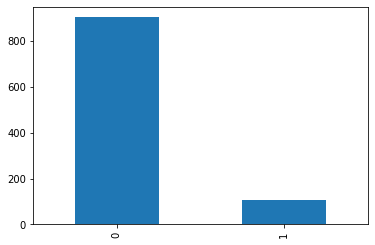

In [61]:
df_comb.fail_in_1h.value_counts().plot.bar()
print(df_comb.fail_in_1h.value_counts())

In [62]:
Fail = df_comb.loc[df_comb.fail_in_1h ==1]
Not_fail = df_comb.loc[df_comb.fail_in_1h==0][:105]
new_df = pd.concat([Fail,Not_fail])
new_df.shape

(210, 13)

**Analyse the effect of different variables**

In [63]:
def hist_(variable):
    bins = np.linspace(df_comb[variable].min(), df_comb[variable].max(), 10)
    g = sns.FacetGrid(df_comb, col = 'gadget_id', hue = 'fail_in_1h', palette = 'Set1', col_wrap=2)
    g.map(plt.hist, variable, bins=bins, ec = 'k')

    g.axes[-1].legend() 
    return(plt.show())

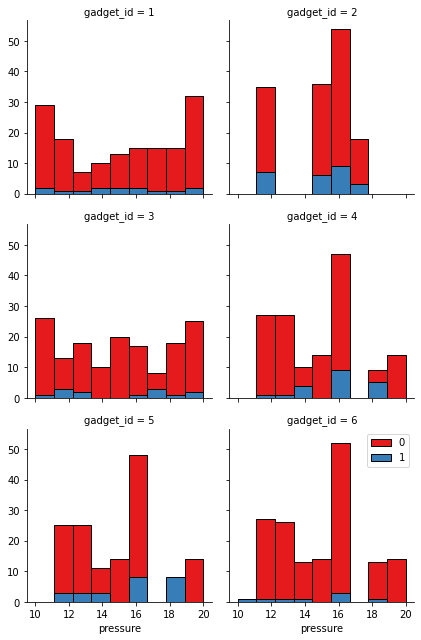

In [64]:
pressure = hist_('pressure')
pressure

**Pressure seems to have no influence on failure rate, however different gadgets will be able to deal with different pressures so use a 6h mean**

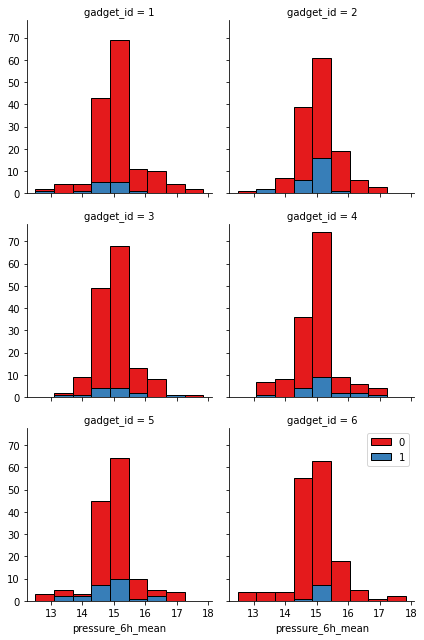

In [65]:
pressure_6h_mean = hist_('pressure_6h_mean')
pressure_6h_mean

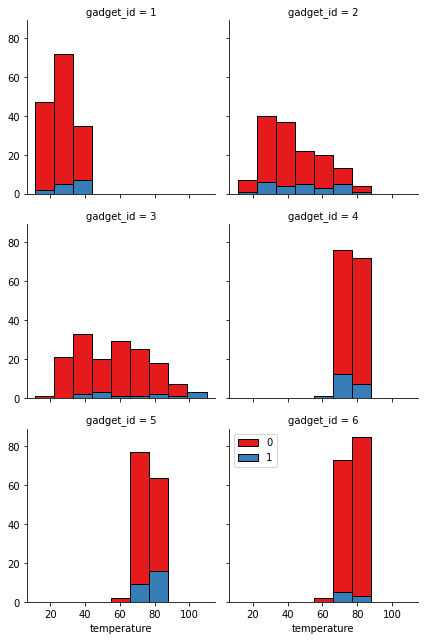

In [66]:
temp = hist_('temperature')
temp

**For the same reason as pressure, do a 6h std for temp**

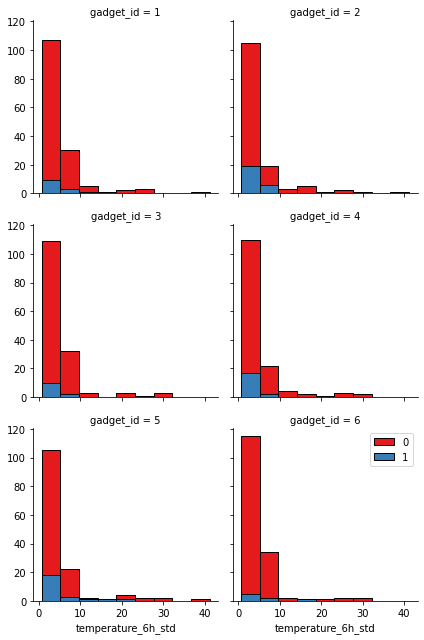

In [67]:
temperature_6h_std = hist_('temperature_6h_std')
temperature_6h_std

In [68]:
df_comb.drop(['Unnamed: 10','Unnamed: 11'], axis = 1, inplace=True)
df_comb

,measurement_time,gadget_id,vibration_x,vibration_y,pressure,temperature,failure_time,time_to_fail,fail_in_1h,temperature_6h_std,pressure_6h_mean
0,2020-07-15 00:00:00.000,1,3,7,16.0,44.114437,2020-07-15 09:56:03.974006640,0 days 09:56:03.974006640,0,NaN,NaN
7,2020-07-15 01:00:00.000,1,8,3,12.0,34.395177,2020-07-15 09:56:03.974006640,0 days 08:56:03.974006640,0,3.453742,15.500000
13,2020-07-15 01:59:59.990,1,10,8,20.0,38.280705,2020-07-15 09:56:03.974006640,0 days 07:56:03.984006640,0,3.803752,16.833333
18,2020-07-15 02:59:59.985,1,6,5,20.0,41.878215,2020-07-15 09:56:03.974006640,0 days 06:56:03.989006640,0,3.679122,15.166667
25,2020-07-15 03:59:59.980,1,6,9,16.0,39.257268,2020-07-15 09:56:03.974006640,0 days 05:56:03.994006640,0,9.337838,13.000000
...,...,...,...,...,...,...,...,...,...,...,...
978,2020-07-21 18:59:59.505,6,6,5,10.0,71.493668,2020-07-21 21:55:15.463450739,0 days 02:55:15.958450739,0,2.523321,14.750000
989,2020-07-21 19:59:59.505,6,6,4,15.0,68.088351,2020-07-21 21:55:15.463450739,0 days 01:55:15.958450739,0,4.888758,14.750000
992,2020-07-21 20:59:59.505,6,7,8,11.0,79.375957,2020-07-21 21:55:15.463450739,0 days 00:55:15.958450739,1,3.862833,15.000000
998,2020-07-21 21:59:59.505,6,6,7,16.0,80.754416,2020-07-21 22:09:51.002875980,0 days 00:09:51.497875980,1,5.541126,14.916667


In [69]:
df_comb=df_comb.dropna()
df_comb

,measurement_time,gadget_id,vibration_x,vibration_y,pressure,temperature,failure_time,time_to_fail,fail_in_1h,temperature_6h_std,pressure_6h_mean
7,2020-07-15 01:00:00.000,1,8,3,12.0,34.395177,2020-07-15 09:56:03.974006640,0 days 08:56:03.974006640,0,3.453742,15.500000
13,2020-07-15 01:59:59.990,1,10,8,20.0,38.280705,2020-07-15 09:56:03.974006640,0 days 07:56:03.984006640,0,3.803752,16.833333
18,2020-07-15 02:59:59.985,1,6,5,20.0,41.878215,2020-07-15 09:56:03.974006640,0 days 06:56:03.989006640,0,3.679122,15.166667
25,2020-07-15 03:59:59.980,1,6,9,16.0,39.257268,2020-07-15 09:56:03.974006640,0 days 05:56:03.994006640,0,9.337838,13.000000
35,2020-07-15 04:59:59.975,1,2,6,10.0,38.927343,2020-07-15 09:56:03.974006640,0 days 04:56:03.999006640,0,3.253625,15.666667
...,...,...,...,...,...,...,...,...,...,...,...
974,2020-07-21 17:59:59.505,6,3,4,12.0,74.444501,2020-07-21 21:55:15.463450739,0 days 03:55:15.958450739,0,3.565896,14.916667
978,2020-07-21 18:59:59.505,6,6,5,10.0,71.493668,2020-07-21 21:55:15.463450739,0 days 02:55:15.958450739,0,2.523321,14.750000
989,2020-07-21 19:59:59.505,6,6,4,15.0,68.088351,2020-07-21 21:55:15.463450739,0 days 01:55:15.958450739,0,4.888758,14.750000
992,2020-07-21 20:59:59.505,6,7,8,11.0,79.375957,2020-07-21 21:55:15.463450739,0 days 00:55:15.958450739,1,3.862833,15.000000


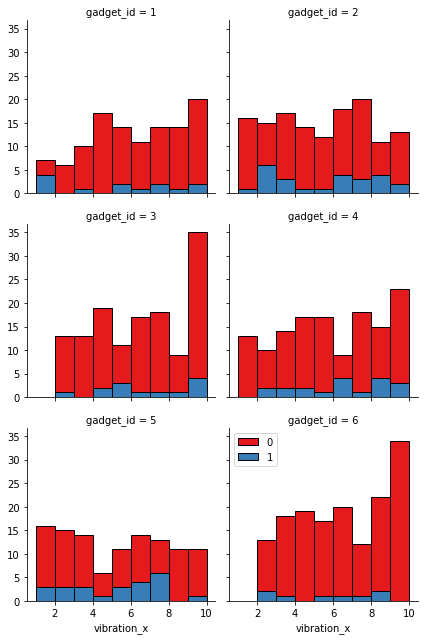

In [70]:
vib_x = hist_('vibration_x')

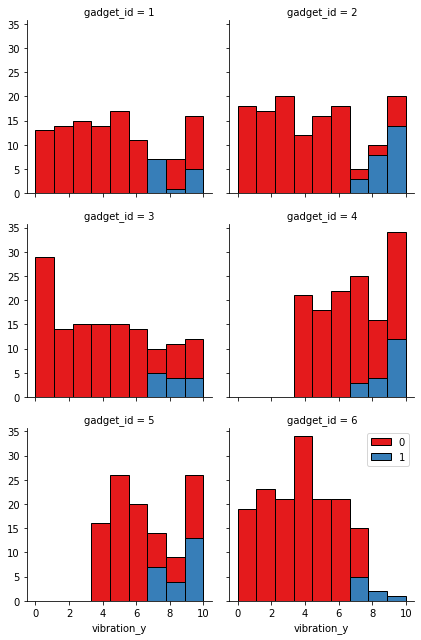

In [71]:
vib_y = hist_('vibration_y')
vib_y

In [72]:
df_comb.fail_in_1h.value_counts()
#imbalanced data set around 1:8

0    786
1    102
Name: fail_in_1h, dtype: int64

In [73]:
X = df_comb[['vibration_y', 'pressure_6h_mean', 'temperature_6h_std']]
y = df_comb[['fail_in_1h']]


In [74]:
X= preprocessing.StandardScaler().fit(X).transform(X)

In [80]:
oversample = SMOTE()
Xs, ys = oversample.fit_resample(X, y)

In [86]:
from sklearn.model_selection import train_test_split
def tts(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return (X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = tts(X,y)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = tts(Xs,ys)

In [87]:
print(y_train.shape)
print(X_train.shape)
print (y_test.shape)
print (X_test.shape)

(621, 1)
(621, 3)
(267, 1)
(267, 3)


In [88]:
print(y_train_sm.shape)
print(X_train_sm.shape)
print (y_test_sm.shape)
print (X_test_sm.shape)

(1100, 1)
(1100, 3)
(472, 1)
(472, 3)


In [91]:
y_t =y_train['fail_in_1h'].to_list()
y_tes = y_test['fail_in_1h'].to_list()
y_train_sm = y_train_sm['fail_in_1h'].to_list()
y_test_sm = y_test_sm['fail_in_1h'].to_list()



In [35]:
from sklearn.metrics import confusion_matrix
def con_mat_plot(matrix, classes, type_of_svm):
    # matrix = matrix.astype('float')/matrix.sum(axis=1)[:, np.newaxis]
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix of ' + str(type_of_svm))
    plt.colorbar()
    ticks = np.arange(len(classes))
    plt.xticks(ticks, classes, rotation=50)
    plt.yticks(ticks, classes)
    threshold = matrix.max()/2.
    
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], '.2f'), horizontalalignment="center", 
                 color="white" if matrix[i, j] > threshold else "black")
    
    
    plt.tight_layout()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

**Logistic Regression** 

In [36]:
from sklearn.linear_model import LogisticRegression
log_regr = LogisticRegression(class_weight={0:1, 1:8})
log_regr.fit(X_train, y_t)


LogisticRegression(class_weight={0: 1, 1: 8})

F1 score for logistic regression:  0.8017884297500956


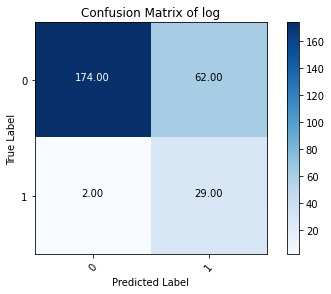

In [37]:
ans= log_regr.predict(X_test)
from sklearn.metrics import f1_score
print ('F1 score for logistic regression: ', f1_score(y_tes, ans, average= 'weighted'))

matrix = confusion_matrix(y_tes, ans, labels=[0, 1])

con_mat_plot(matrix, [0, 1], 'log')

**Support Vector Machine**

In [38]:
from sklearn.svm import SVC
svm = SVC(class_weight={0:1, 1:8},
    C=1,
    random_state=42,
    kernel='rbf')
svm.fit(X_train, y_t)

SVC(C=1, class_weight={0: 1, 1: 8}, random_state=42)

F1 score for support vector machine:  0.7751903040714951


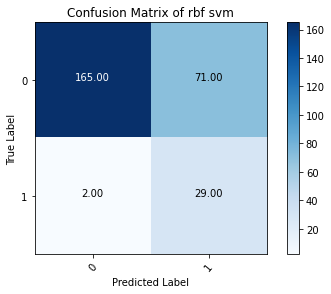

In [39]:
ans_svm= svm.predict(X_test)
print ('F1 score for support vector machine: ', f1_score(y_tes, ans_svm, average= 'weighted'))

matrix = confusion_matrix(y_tes, ans_svm, labels=[0, 1])

con_mat_plot(matrix, [0, 1], 'rbf svm')

In [40]:
svm = SVC(class_weight={0:1, 1:8},
    C=1,
    random_state=42,
    kernel='linear')
svm.fit(X_train, y_t)

SVC(C=1, class_weight={0: 1, 1: 8}, kernel='linear', random_state=42)

F1 score for support vector machine:  0.7753646774899084


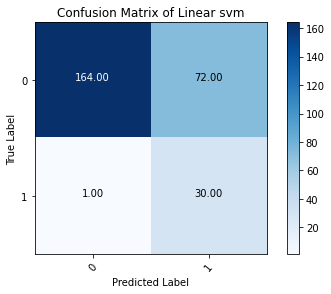

In [41]:
ans_svm= svm.predict(X_test)
print ('F1 score for support vector machine: ', f1_score(y_tes, ans_svm, average= 'weighted'))

matrix = confusion_matrix(y_tes, ans_svm, labels=[0, 1])

con_mat_plot(matrix, [0, 1], 'Linear svm')

**Decision Tree**

In [82]:
from sklearn.tree import DecisionTreeClassifier 
def dec_tree_class(X_train, Y_train, X_test, Y_test):
    Drugtree = DecisionTreeClassifier(criterion= 'entropy',max_depth=5)
    Drugtree.fit(X_train, Y_train)
    ans_tree= Drugtree.predict(X_test)
    print('F1 score for Decision Tree: ', f1_score(Y_test, ans_tree, average= 'weighted'))
    matrix = confusion_matrix(y_tes, ans_tree, labels=[0, 1])

    return(con_mat_plot(matrix, [0, 1], 'Dec Tree'))

F1 score for Decision Tree:  0.8258522347914002


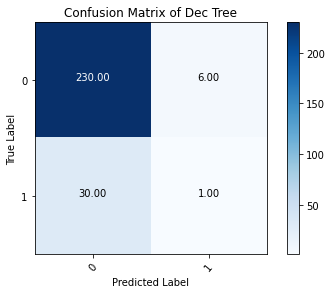

In [83]:
DTC = dec_tree_class(X_train, y_t,X_test,y_tes)

**KNN**

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

F1 score for KNN with 1 neighbours 0.8295959750845178
F1 score for KNN with 2 neighbours 0.841444044479112
F1 score for KNN with 3 neighbours 0.8267840580751328
F1 score for KNN with 4 neighbours 0.8222954145907597
F1 score for KNN with 5 neighbours 0.8129367097384255
F1 score for KNN with 6 neighbours 0.8377577948712622
F1 score for KNN with 7 neighbours 0.8473843454846337
F1 score for KNN with 8 neighbours 0.8199990975136501
F1 score for KNN with 9 neighbours 0.8333056872382716
F1 score for KNN with 10 neighbours 0.8299991476517807
F1 score for KNN with 11 neighbours 0.8258522347914002


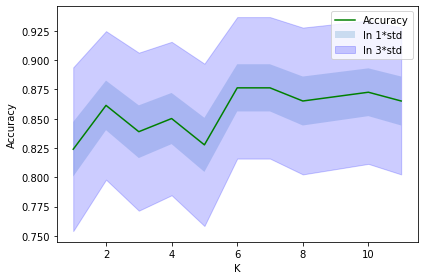

In [47]:
# Initialising Variables
k_to_try = 12
means = np.zeros((k_to_try-1))
stds = np.zeros((k_to_try-1))

# Fitting KNN Model for each k, saving down the mean and standard deviation of the accuracy
for i in range(1, k_to_try):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_t)
    predicted = knn.predict(X_test)
    means[i-1]=metrics.accuracy_score(y_tes, predicted)
    stds[i-1]=np.std(predicted == y_tes)/np.sqrt(predicted.shape[0])
    print ('F1 score for KNN with ' +str(i)+' neighbours', f1_score(y_test, predicted, average= 'weighted'))
    
# Plotting accuracy along side +/- 1 and 3 stds
plt.plot(range(1, k_to_try), means, 'g')
plt.fill_between(range(1, k_to_try), means-1*stds, means+1*stds, alpha=0.2)
plt.fill_between(range(1, k_to_try), means-3*stds, means+3*stds, alpha=0.2, color="blue")
plt.legend(('Accuracy', 'In 1*std', 'In 3*std'))
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.tight_layout()
plt.show()

In [33]:
from keras import models
from keras import layers

In [48]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import regularizers
# Set random seed

number_of_features = 3



# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", input_dim=3,kernel_regularizer=regularizers.l2(0.1)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu",kernel_regularizer=regularizers.l2(0.1)))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
 optimizer="rmsprop", # Root Mean Square Propagation
 metrics=["accuracy"]) # Accuracy performance metri

In [50]:
X_train = np.array(X_train)
y_t=np.array(y_t)
X_test = np.array(X_test)
y_tes = np.array(y_tes)

In [51]:
history = network.fit(x= X_train,y =  y_t, epochs=30, verbose=1,validation_data = (X_test, y_tes)) # Test data

Epoch 1/30
20/20 [==============================] - 22s 50ms/step - loss: 2.6258 - accuracy: 0.6815 - val_loss: 2.3433 - val_accuracy: 0.8839
Epoch 2/30
20/20 [==============================] - 0s 3ms/step - loss: 2.2815 - accuracy: 0.8753 - val_loss: 2.0817 - val_accuracy: 0.8839
Epoch 3/30
20/20 [==============================] - 0s 2ms/step - loss: 2.0335 - accuracy: 0.8799 - val_loss: 1.8497 - val_accuracy: 0.8839
Epoch 4/30
20/20 [==============================] - 0s 2ms/step - loss: 1.8061 - accuracy: 0.8851 - val_loss: 1.6425 - val_accuracy: 0.8839
Epoch 5/30
20/20 [==============================] - 0s 2ms/step - loss: 1.5971 - accuracy: 0.8912 - val_loss: 1.4549 - val_accuracy: 0.8839
Epoch 6/30
20/20 [==============================] - 0s 4ms/step - loss: 1.4125 - accuracy: 0.8930 - val_loss: 1.2880 - val_accuracy: 0.8839
Epoch 7/30
20/20 [==============================] - 0s 3ms/step - loss: 1.2419 - accuracy: 0.9011 - val_loss: 1.1396 - val_accuracy: 0.8839
Epoch 8/30
20/20 [

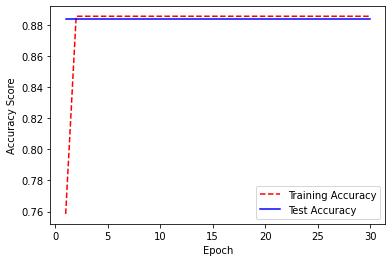

In [52]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
epoch_count = range(1, len(training_accuracy) + 1)
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();